<a href="https://colab.research.google.com/github/avraichur96/Spiking-Neural-Nets/blob/main/Practice_Spiking_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First things first, we do not have to reinvent the wheel and need something to do stuff like rate encoding and simulate the leaky integrate and fire neuron. SNNTORCH to the rescue!

In [5]:
pip install snntorch


Lets proceed to load MNIST data and some data loader. MNIST is always best when trying to gain an intuitive understanding of any neural net. SNNtorch has In built helpers like transform that take care of the usual data normalization techniques reducing the amount of redundant code to be written.(scaling,    padding bits etc.)


In [6]:
import snntorch as snn
import torch

batch_size=128
data_path='/tmp/data/mnist'
num_classes = 10  # MNIST has 10 output classes

# Torch Variables
dtype = torch.float

from torchvision import datasets, transforms

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)


In [7]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)
print(f"The size of mnist_train is {len(mnist_train)}")

The size of mnist_train is 6000


In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [9]:
from snntorch import spikegen

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)
num_steps = 10
print(data_it.size())

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps)


torch.Size([128, 1, 28, 28])


I need to understand more about rate coding and spike generation in probabilistic way. In the sense that if you define a rate coding of say 10 timesteps and your probability value is 0.45 it means each at each timestep you sample from the fire or not fire with 45% chance

Now this is what I live for! actually being able to feel an image from the perspective of a leaky bunch of neurons and capture it visually.

torch.Size([10, 28, 28])


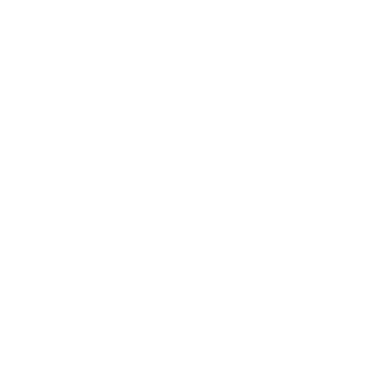

In [10]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

HTML(anim.to_html5_video())

In [ ]:
anim.save("spike_mnist_test.mp4")
